<a href="https://colab.research.google.com/github/VidhyaKishor27/Pythonbasic/blob/main/Miniproject_5_Forest_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Reading files

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
from tabulate import tabulate
from google.colab import drive
drive.mount('/content/drive')
ff=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/forestfires.csv')
pd.to_datetime(ff['month'], format='%b').dt.month_name()
#ff['month']=ff['month'].strftime('%B')
print(ff.head(3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   X  Y    month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5    March  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4  October  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4  October  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0


1. Top 10 maximum burnt area happened on which month.
Output:
month,area


In [29]:
top_10_burntarea=ff.groupby('month')['area'].max().reset_index()
#burnt_area=top_10_burntarea.nlargest(10)
top_10_burntarea.columns=['Month','Area']
print(tabulate(top_10_burntarea.nlargest(10,'Area'),headers=['Month','Area'],tablefmt='grid'))

+----+-----------+---------+
|    | Month     |    Area |
+====+===========+=========+
| 11 | September | 1090.84 |
+----+-----------+---------+
|  1 | August    |  746.28 |
+----+-----------+---------+
|  5 | July      |  278.53 |
+----+-----------+---------+
|  6 | June      |   70.32 |
+----+-----------+---------+
|  0 | April     |   61.13 |
+----+-----------+---------+
|  3 | February  |   51.78 |
+----+-----------+---------+
| 10 | October   |   49.37 |
+----+-----------+---------+
|  8 | May       |   38.48 |
+----+-----------+---------+
|  7 | March     |   36.85 |
+----+-----------+---------+
|  2 | December  |   24.77 |
+----+-----------+---------+


2. Highest temperature and lowest temperature for each month.
Output:
month,highest_temp, lowest_temp


In [35]:
temperature=ff.groupby(by=['month']).aggregate({"temp":['max','min']}).reset_index()
temperature.columns=['Month','Highest Temp','Lowest Temp']
print(temperature)
! pip install sorted-months-weekdays
! pip install sort-dataframeby-monthorweek
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
new=Sort_Dataframeby_Month(df=temperature,monthcolumnname='Month') # sorts the dataframe in month order
print(tabulate(new,headers=['Month','Highest Temp','Lowest Temp'],tablefmt='grid'))




        Month  Highest Temp  Lowest Temp
0       April          17.6          5.8
1      August          33.3          5.1
2    December           5.1          2.2
3    February          15.7          4.2
4     January           5.3          5.2
5        July          30.2         12.6
6        June          28.0         10.6
7       March          18.8          5.3
8         May          18.0         11.3
9    November          11.8         11.8
10    October          21.7         11.3
11  September          30.2          9.8
+----+-----------+----------------+---------------+
|    | Month     |   Highest Temp |   Lowest Temp |
+====+===========+================+===============+
|  0 | January   |            5.3 |           5.2 |
+----+-----------+----------------+---------------+
|  1 | February  |           15.7 |           4.2 |
+----+-----------+----------------+---------------+
|  2 | March     |           18.8 |           5.3 |
+----+-----------+----------------+---------------+

3. Monthly when highest wind and lowest wind happened.
Output:
month,highest_wind, lowest_wind


In [40]:
winding=ff.groupby(by=['month']).aggregate({"wind":['max','min']}).reset_index()
winding.columns=['Month','Highest Wind','Lowest Wind']
wind_new=Sort_Dataframeby_Month(df=winding,monthcolumnname='Month') # sorts the dataframe in month order
print(tabulate(wind_new,headers=['Month','Highest Wind','Lowest Wind'],tablefmt='grid'))


+----+-----------+----------------+---------------+
|    | Month     |   Highest Wind |   Lowest Wind |
+====+===========+================+===============+
|  0 | January   |            3.1 |           0.9 |
+----+-----------+----------------+---------------+
|  1 | February  |            9.4 |           0.9 |
+----+-----------+----------------+---------------+
|  2 | March     |            9.4 |           0.9 |
+----+-----------+----------------+---------------+
|  3 | April     |            9.4 |           1.8 |
+----+-----------+----------------+---------------+
|  4 | May       |            4.9 |           4   |
+----+-----------+----------------+---------------+
|  5 | June      |            9.4 |           1.3 |
+----+-----------+----------------+---------------+
|  6 | July      |            8   |           0.9 |
+----+-----------+----------------+---------------+
|  7 | August    |            8.9 |           0.4 |
+----+-----------+----------------+---------------+
|  8 | Septe

4. Highest and lowest relative humidity for each month.
Output:
month,highest_rh, lowest_rh


In [42]:
humidity=ff.groupby('month').aggregate({"RH":['max','min']}).reset_index()
humidity.columns=['Month','Highest Humidity','Lowest Humidity']
new_hum=Sort_Dataframeby_Month(df=humidity,monthcolumnname='Month') # sorts the dataframe in month order
print(tabulate(new_hum,headers=['Month','Highest Humidity','Lowest Humidity'],tablefmt='grid'))

+----+-----------+--------------------+-------------------+
|    | Month     |   Highest Humidity |   Lowest Humidity |
+====+===========+====================+===================+
|  0 | January   |                100 |                78 |
+----+-----------+--------------------+-------------------+
|  1 | February  |                 82 |                35 |
+----+-----------+--------------------+-------------------+
|  2 | March     |                 99 |                18 |
+----+-----------+--------------------+-------------------+
|  3 | April     |                 75 |                20 |
+----+-----------+--------------------+-------------------+
|  4 | May       |                 94 |                40 |
+----+-----------+--------------------+-------------------+
|  5 | June      |                 90 |                25 |
+----+-----------+--------------------+-------------------+
|  6 | July      |                 90 |                22 |
+----+-----------+--------------------+-

5. Join the output from questions 1-4 above.
Output:
month,area,highest_temp, lowest_temp,highest_wind, lowest_wind,highest_rh, lowest_rh


In [45]:
df=top_10_burntarea.merge(new,on='Month',how='inner')
df1=df.merge(wind_new,on='Month',how='inner')
df2=df1.merge(new_hum,on='Month',how='inner')
df3=Sort_Dataframeby_Month(df=df2,monthcolumnname='Month')
print(tabulate(df3,headers=['Month','Area','Highest Temp','Lowest Temp','Highest Wind','Lowest Wind','Highest Humidity','Lowest Humidity'],tablefmt='grid'))

+----+-----------+---------+----------------+---------------+----------------+---------------+--------------------+-------------------+
|    | Month     |    Area |   Highest Temp |   Lowest Temp |   Highest Wind |   Lowest Wind |   Highest Humidity |   Lowest Humidity |
+====+===========+=========+================+===============+================+===============+====================+===================+
|  0 | January   |    0    |            5.3 |           5.2 |            3.1 |           0.9 |                100 |                78 |
+----+-----------+---------+----------------+---------------+----------------+---------------+--------------------+-------------------+
|  1 | February  |   51.78 |           15.7 |           4.2 |            9.4 |           0.9 |                 82 |                35 |
+----+-----------+---------+----------------+---------------+----------------+---------------+--------------------+-------------------+
|  2 | March     |   36.85 |           18.8 |   

6. Plot a group bar chart for the output in question 5.
For schema, see Appendix here
X-axis -> Month;
Bar 1 -> highest_temp;
Bar 2 -> highest_wind;
Bar 3 -> highest_rh


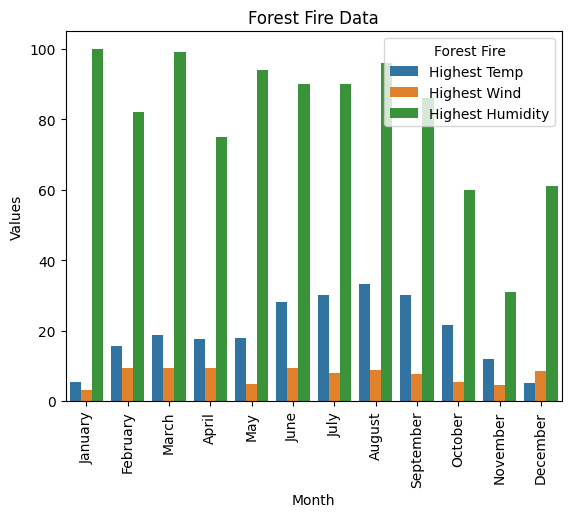

In [47]:
del df3['Area']
del df3['Lowest Humidity']
del df3['Lowest Temp']
del df3['Lowest Wind']
df_melted = df3.melt("Month",var_name="Forest Fire",value_name="Values")
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Month',y='Values',hue='Forest Fire',data=df_melted)
plt.xticks(rotation=90)
plt.title('Forest Fire Data')
plt.show()


Part 2:
reading files

In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
dept=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/department.csv')
notactive=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/not_active.csv')
emp=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/employee.csv')
print(dept.head(3))
print(notactive.head(3))
print(emp.head(3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   emp_id department
0       1      sales
1       2      sales
2       3      sales
   emp_id
0       3
1       7
   emp_id  salary
0       1     100
1       2     120
2       3     145


1. Find Maximum salary for each department only active employees and output requires `emp_id`:
————————--------
Expected result:
————————--------
emp_id, department, max_salary
4,'sales',140
6,'marketing',150


In [17]:
df4=emp.merge(dept,on='emp_id',how='inner')
df5_inactive=df4.merge(notactive,on='emp_id',how='right')
active=pd.merge(df4,df5_inactive,indicator=True,how='outer').query(~df4['emp_id'].isin(df5_inactive['emp_id']))
#cond1= notactive['emp_id'] != df4['emp_id']
#df5_active=df4[~notactive['emp_id'].isin(df4['emp_id'])]
print(df4)
print(df5_inactive)
print(active)

ValueError: expr must be a string to be evaluated, <class 'pandas.core.series.Series'> given